### Todo:

##### Task 1:

1) Check the performances of providers and find out which provider has worst or better performance with respect to mapMatching values.

2) Find the reason for why one of the providers is the worst amongst the others.


##### Task 2:

Check how driver drives at different times spans of the day. Make comparisons between different days during same hours. This will tell us if the time of the day makes a difference in the avg. driving speed(kph) i.e how time of the day effects the driving speed.


##### Task 3:

Calculate additional features from the given features. ( TimeDiff & RoadLength )

##### Task 4:

Try to predict the missing MapMatching values

Steps:

1) Convert timestamp to unix timestamp

2) train the model on the timediff, speed, roadlength  and data providers as features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import datashader as ds
from numpy.random import random
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
import datashader.transfer_functions as tf
from bokeh.io.export import get_screenshot_as_png
import scipy.special
%matplotlib inline
output_notebook()

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y.%m.%d_%H:%M:%S')
df = pd.read_csv("./example3.csv", parse_dates=[0], header=None, date_parser=dateparse, index_col=0)
df

1    2   3
0                                  
2017-11-15 17:19:56  30.25   10   0
2017-11-15 17:17:13   7.66   --   1
2017-11-15 17:15:27  32.75   --   2
2017-11-15 17:15:21  38.25   14   3
2017-11-15 17:13:52  29.38   --   1
2017-11-15 17:13:31  38.75   --   1
2017-11-15 17:11:55  23.75   --   1
2017-11-15 17:11:46  39.75   --   1
2017-11-15 17:10:30  13.88   --   1
2017-11-15 17:10:24   8.25   16   1
2017-11-15 17:07:34   7.44   10   1
2017-11-15 17:07:28   5.75    6   1
2017-11-15 17:07:12   7.41   15   2
2017-11-15 17:05:23   4.47   17   4
2017-11-15 17:05:10  21.00   13   2
2017-11-15 17:04:56  18.00   --   5
2017-11-15 17:04:30  37.75   --   1
2017-11-15 17:02:40  20.50   --   1
2017-11-15 17:02:01  31.50   --   2
2017-11-15 17:01:45  40.75   --   1
2017-11-15 17:01:39  38.25   --   2
2017-11-15 17:00:04  27.38    7   1
2017-11-15 16:57:05  13.38   14   1
2017-11-15 16:57:02  24.38   --   1
2017-11-15 16:56:49   6.66   12   4
2017-11-15 16:56:40   6.75   --   1
2017-11-15 16:56:01  33.25   --   2
2017-11-15 16:55:33  12.75   16   1
2017-11-15 16:55:16   7.56   16   2
2017-11-15 16:55:05  31.38   --   5
...                    ...  ...  ..
2015-01-01 01:30:49  44.00   --   6
2015-01-01 01:30:42  40.00   --   6
2015-01-01 01:29:45  45.50   --   6
2015-01-01 01:29:45  36.00   --   6
2015-01-01 01:28:44  44.00   --   6
2015-01-01 00:51:54  45.75   --   6
2015-01-01 00:50:13  21.25   --   6
2015-01-01 00:49:44  43.25   -9   6
2015-01-01 00:45:56  44.25   -7   6
2015-01-01 00:45:44  38.75   --  15
2015-01-01 00:44:50  45.75    4   6
2015-01-01 00:41:52  58.00   -7  15
2015-01-01 00:40:42  49.75   --   6
2015-01-01 00:38:49  39.25   --  15
2015-01-01 00:33:16   0.98   -3   6
2015-01-01 00:29:34  39.25    2  15
2015-01-01 00:28:59   3.58    8   6
2015-01-01 00:26:28  11.62   --   2
2015-01-01 00:25:15  49.00   --  15
2015-01-01 00:23:45  46.00    2   6
2015-01-01 00:23:42  29.62   --   6
2015-01-01 00:20:47  39.25   --   4
2015-01-01 00:18:48  32.00   --   2
2015-01-01 00:18:48  46.00   -1  15
2015-01-01 00:18:42  32.75   -5   2
2015-01-01 00:17:43  32.25   --   2
2015-01-01 00:16:52  43.25   -1   2
2015-01-01 00:14:56  50.50   --   8
2015-01-01 00:10:29  26.62   --   2
2015-01-01 00:09:58  46.00  -11   2

[951938 rows x 3 columns]

###### Unique Days

In [130]:
len(df.index.map(lambda t: t.date()).unique())

1050

## Task 1 (Solution):

<font color='green'>


</font>

Finding the worst provider with maximum -- values in the dataset.

<font color='green'>We come to conclude that the worst provider is provider 1</font> 

Now we'll try to figure out why ?

In [200]:
df_no_dash = df.replace('--',np.NaN)
df_no_dash = df_no_dash[df_no_dash[2].isnull()].groupby(3)[1].count().reset_index()
df_no_dash

3       1
0    1  191518
1    2  121152
2    3    1303
3    4   79506
4    5   27622
5    6   46855
6    7    1234
7    8   13470
8    9     671
9   10     148
10  11     400
11  12      74
12  13     519
13  14      10
14  15   23366
15  17       2
16  18      50
17  19       2

<font color='green'>Next the idea is to scatter plot the average speed with respect to time to find out patterns that helps us identify why the MapM values are missing in our data. The range of speed for both the plots with and without '--' values is somewhat similar but we do identify in the second plot that the points distribution is more dense in the later times compared to the previous times. One idea to further visualize it will be to identify how the difference in time between readings is effecting the MapM values.</font>

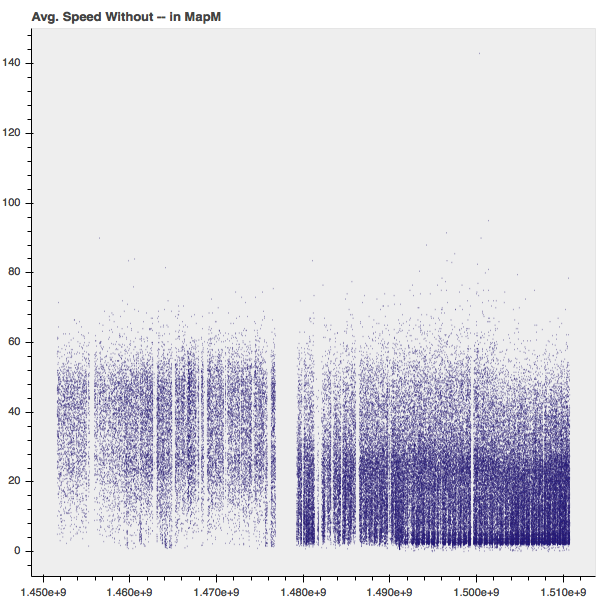

In [10]:
def mscatter(p, x, y, marker):
    p.scatter(x, y, marker=marker, size=0.5,
              line_color="navy", fill_color="orange", alpha=0.5)

def get_separated_mapm(df_start):    
    df_prov_1 = df_start[df_start[3] == 1]
    df_prov_1 = df_prov_1.rename(index=str, columns={1:"Speed", 2:"MapM", 3:"Provider"})
    df_prov_1.index = pd.to_datetime(df_prov_1.index)
    df_prov_1.index = [t.value // 10 ** 9 for t in df_prov_1.index]
    df_prov_1.loc[:,'Time'] = df_prov_1.index
    df_prov_1 = df_prov_1.replace('--',np.NaN)

    df_with_dash = df_prov_1[df_prov_1['MapM'].isnull()]
    df_without_dash = df_prov_1.dropna()
    
    return df_with_dash, df_without_dash

df_with_dash, df_without_dash = get_separated_mapm(df)
p = figure(title="Avg. Speed With -- in MapM", toolbar_location=None)
p2 = figure(title="Avg. Speed Without -- in MapM", toolbar_location=None)

p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"
p2.grid.grid_line_color = None
p2.background_fill_color = "#eeeeee"

mscatter(p, df_with_dash.loc[:,'Time'].values, df_with_dash.loc[:,'Speed'].values, "circle")
mscatter(p2, df_without_dash.loc[:,'Time'].values, df_without_dash.loc[:,'Speed'].values, "circle")

# show(p)
# show(p2)
get_screenshot_as_png(p, driver=None)


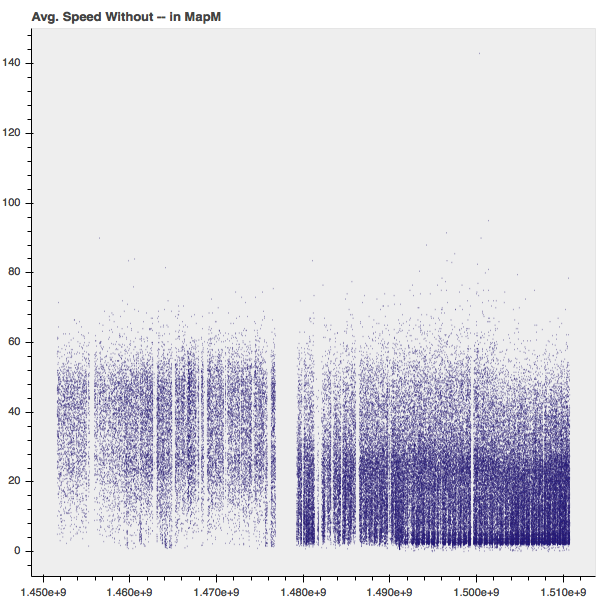

In [11]:
get_screenshot_as_png(p2, driver=None)

<font color='green'>If we take a look at the resulting plot below. We can see that for the first scatter plot most of the values have a large time difference between the previous and the next reading. Ofcourse this is not the only factor that is playing it's part in the reading not being able to detected properly but this is one major factor. While for the second plot, it can be clearly observed that most of the values have a smaller time difference. 
    
<b>Note:</b> The x-axis represent the time difference between the last reading and the next reading. And y-axis represent the speed of the data. The first plot represents all the samples where we have MapM values while the second represents the samples without MapM values.
</font>

In [110]:
def calculate_time_diff(time_df):
    df2 = pd.DataFrame(time_df.index)
#     time_df.index = [t.value // 10 ** 9 for t in time_df.index]
    df2[0] = df2.diff(periods=-1)
    df2.index = time_df.index
    df3 = pd.merge(df2,time_df,on=df2.index)
    return df3

df3 = calculate_time_diff(df)
df_with_dash, df_without_dash = get_separated_mapm(df3)
df_with_dash2 = df_with_dash.rename(index=str, columns={"key_0": "Timestamp", 0: "TimeDiff", 1:"Speed", 2:"MapM", 3:"Provider"})
df_without_dash2 = df_without_dash.rename(index=str, columns={"key_0": "Timestamp", 0: "TimeDiff", 1:"Speed", 2:"MapM", 3:"Provider"})

p3 = figure(title="Avg. Speed With -- in MapM", toolbar_location=None)
p4 = figure(title="Avg. Speed Without -- in MapM", toolbar_location=None)

p3.grid.grid_line_color = None
p4.background_fill_color = "#eeffff"
p3.grid.grid_line_color = None
p4.background_fill_color = "#eeeeee"

mscatter(p3, df_with_dash2.loc[:,'TimeDiff'].values, df_with_dash2.loc[:,'Speed'].values, "circle")
mscatter(p4, df_without_dash2.loc[:,'TimeDiff'].values, df_without_dash2.loc[:,'Speed'].values, "circle")

show(p3)
show(p4)

## Task 2 (Solution)


###### divided each day into 4 quaters. 
- q1 = 00:00 to 06:00
- q2 = 06:00 to 12:00
- q3 = 12:00 to 18:00
- q4 = 18:00 to 23:00

###### And than, visualized the distribution of  speed values among different times of the day. The following points can be observed from the results.
<font color='green'>

The plot of q1 suggests most of the people are driving slightly above 40km/h. This is the only quarter where most of the drivers prefer to go around 40km/h or more (on average) while for the other quarters(q2,q3,q4) it can be observed that there are two spikes in the graphs. This can be due to the fact that the other quarters represent more busy parts of the day where drivers can be caused to slow down.</font>

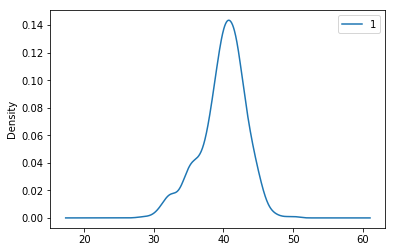

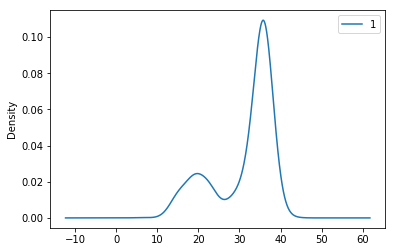

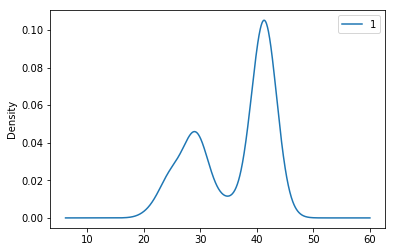

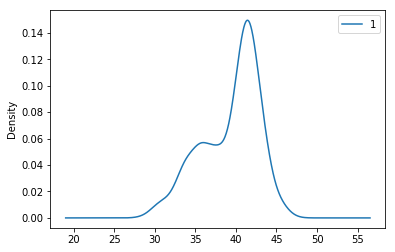

In [169]:
groupedday_hr = df.groupby([df.index.date,df.index.hour])[1].mean()
result = groupedday_hr.reset_index(level=0)

result[2] = np.where((result[0] >= 0) & (result[0] < 6),'q1','q2')
result.loc[(result[0]>=12) & (result[0]<18),2] = 'q3'
result.loc[(result[0]>=18) & (result[0]<24),2] = 'q4'

## now we group w.r.t dates and quartes and find out how drivers drove every day on those specific quarters.
quarters_avg_speed = result.groupby([result.index,result[2]])[1].mean().reset_index(level=1)
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q1'].plot.kde()
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q2'].plot.kde()
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q3'].plot.kde()

quarters_avg_speed.loc[quarters_avg_speed[2] == 'q4'].plot.kde()

## Task 3 (Solution)


<font color='green'>

We calculate additional feature i.e the <b>time difference</b> from the last reading to the current reading. This additional feature will be a good use to find patterns in data to train a machine learning model for prediction of MapMatching values. This will also ensure a feature with values repeating in a certain range whereas the timestamp contains unique values for each sample which doesn't tells us much.
</font>

In [21]:
# step (1)
df3 = calculate_time_diff(df)
df3 = df3.rename(index=str, columns={"key_0": "Timestamp", 0: "TimeDiff", 1:"Speed", 2:"MapM", 3:"Provider"})
df3

Timestamp  TimeDiff  Speed MapM  Provider
0        1510766396     163.0  30.25   10         0
1        1510766233     106.0   7.66   --         1
2        1510766127       6.0  32.75   --         2
3        1510766121      89.0  38.25   14         3
4        1510766032      21.0  29.38   --         1
5        1510766011      96.0  38.75   --         1
6        1510765915       9.0  23.75   --         1
7        1510765906      76.0  39.75   --         1
8        1510765830       6.0  13.88   --         1
9        1510765824     170.0   8.25   16         1
10       1510765654       6.0   7.44   10         1
11       1510765648      16.0   5.75    6         1
12       1510765632     109.0   7.41   15         2
13       1510765523      13.0   4.47   17         4
14       1510765510      14.0  21.00   13         2
15       1510765496      26.0  18.00   --         5
16       1510765470     110.0  37.75   --         1
17       1510765360      39.0  20.50   --         1
18       1510765321      16.0  31.50   --         2
19       1510765305       6.0  40.75   --         1
20       1510765299      95.0  38.25   --         2
21       1510765204     179.0  27.38    7         1
22       1510765025       3.0  13.38   14         1
23       1510765022      13.0  24.38   --         1
24       1510765009       9.0   6.66   12         4
25       1510765000      39.0   6.75   --         1
26       1510764961      28.0  33.25   --         2
27       1510764933      17.0  12.75   16         1
28       1510764916      11.0   7.56   16         2
29       1510764905       7.0  31.38   --         5
...             ...       ...    ...  ...       ...
1039214  1420075785      61.0  45.50   --         6
1039215  1420075785      61.0  36.00   --         6
1039216  1420075724    2210.0  44.00   --         6
1039217  1420073514     101.0  45.75   --         6
1039218  1420073413      29.0  21.25   --         6
1039219  1420073384     228.0  43.25   -9         6
1039220  1420073156      12.0  44.25   -7         6
1039221  1420073144      54.0  38.75   --        15
1039222  1420073090     178.0  45.75    4         6
1039223  1420072912      70.0  58.00   -7        15
1039224  1420072842     113.0  49.75   --         6
1039225  1420072729     333.0  39.25   --        15
1039226  1420072396     222.0   0.98   -3         6
1039227  1420072174      35.0  39.25    2        15
1039228  1420072139     151.0   3.58    8         6
1039229  1420071988      73.0  11.62   --         2
1039230  1420071915      90.0  49.00   --        15
1039231  1420071825       3.0  46.00    2         6
1039232  1420071822     175.0  29.62   --         6
1039233  1420071647     119.0  39.25   --         4
1039234  1420071528       0.0  32.00   --         2
1039235  1420071528       0.0  46.00   -1        15
1039236  1420071528       6.0  32.00   --         2
1039237  1420071528       6.0  46.00   -1        15
1039238  1420071522      59.0  32.75   -5         2
1039239  1420071463      51.0  32.25   --         2
1039240  1420071412     116.0  43.25   -1         2
1039241  1420071296     267.0  50.50   --         8
1039242  1420071029      31.0  26.62   --         2
1039243  1420070998       NaN  46.00  -11         2

[1039244 rows x 5 columns]

In [22]:
# step (3.1) - first take the records on for which you have MapM value
df4 = df3.replace('--',np.NaN)
df4['MapM'] = df4['MapM'].apply(pd.to_numeric)

##### Visualizing the correlation matrix plot of found features in a plot
<font color='green'>
We're just visualizing here how different features in the data are correlated to each other. 

Additioanlly,We are calculating a feature called <b>Road Length</b> using a simple speed=distance/time formula to estimate the length of road using the average given speed and the timedifference we calculated previously between the previous and the current reading. 
</font>

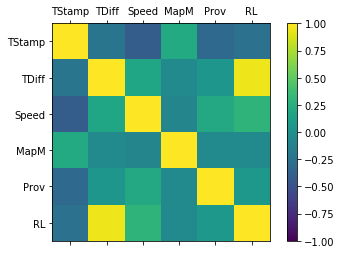

In [23]:
df4 = df4.dropna()
df4['RoadLength'] = df4['TimeDiff'] * df4['Speed']
correlations = df4.corr()
names = ['TStamp','TDiff','Speed', 'MapM','Prov','RL']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Task 4 (Solution)
<font color='green'>
    
We use RandomForest to estimate the missing MapM values in our data. Different values of n_estimators are tried and the best one is shown here.</font>

In [123]:
def get_features_labels(data):
    train_features = data.drop(['MapM','Timestamp'],axis=1)
    train_label = data['MapM']
    return train_features, train_label

train, test = train_test_split(df4, test_size=0.1)
train_features, train_label = get_features_labels(train)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_label);

#### Prediction Loss (MSE) :

<font color='green'>Find the mean squared error for the above trained RandomForest algorithm</font>

In [125]:
test_features, test_label = get_features_labels(test)

predictions = rf.predict(test_features)

squared_error = mean_squared_error(predictions,test_label.values)
squared_error

64.75308193259312

In [107]:
p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'



p2 = figure(title="Log Normal Distribution (μ=0, σ=0.5)", tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.lognormal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, 1000)
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2

p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = 'Pr(x)'



p3 = figure(title="Gamma Distribution (k=1, θ=2)", tools="save",
            background_fill_color="#E8DDCB")

k, theta = 1.0, 2.0

measured = np.random.gamma(k, theta, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, 1000)
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)

p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = 'Pr(x)'



p4 = figure(title="Weibull Distribution (λ=1, k=1.25)", tools="save",
            background_fill_color="#E8DDCB")

lam, k = 1, 1.25

measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = 'Pr(x)'
show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))